In [1]:
!nvidia-smi

Thu Dec 16 03:47:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from tensorflow import keras

In [3]:
myModel = keras.models.load_model('/content/drive/MyDrive/seminar/project/model')

In [4]:
myModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 326, 326, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 160, 160, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [5]:
import cv2
import tensorflow as tf
import numpy as np

In [6]:
from google.colab.patches import cv2_imshow

In [7]:
retinopathy = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']

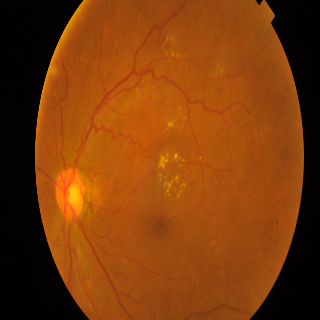

In [11]:
predimg = cv2.imread('/content/drive/MyDrive/seminar/project/testImg/00a8624548a9.png')
predimg = cv2.resize(predimg, (320,320))
cv2_imshow(predimg)
predimg = predimg/255
predimg = predimg.reshape((1,) + predimg.shape)

In [12]:
result = myModel.predict(predimg)
print(np.argmax(result))
print(retinopathy[np.argmax(result)])

2
Moderate


In [13]:
result

array([[5.9016369e-04, 6.5420084e-03, 9.8813605e-01, 5.3089787e-04,
        4.2009554e-03]], dtype=float32)

In [14]:
tf.nn.softmax(result)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.14938381, 0.15027557, 0.40104145, 0.14937496, 0.14992417]],
      dtype=float32)>

In [ ]:
np.argmax(result)

0

In [ ]:
retinopathy[np.argmax(result)]

'No DR'